In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [2]:
df = pd.read_csv("cleaned_reviewss.csv")
df.head(10)

,Index,Name,Overall_Rating,Cuisine,Rate for two,City,Review
0,0,Oliver Brown,3.9,"Cafe, Coffee, Shake, Juices, Beverages, Waffle...",500,ahmedabad,Been to this place times Prakash is always ver...
1,1,Oliver Brown,3.9,"Cafe, Coffee, Shake, Juices, Beverages, Waffle...",500,ahmedabad,I recently visited Oliver Brown on a weekend f...
2,2,Crush Coffee,3,"Cafe, Shake, Beverages, Desserts",600,ahmedabad,Very watery ans thin shake
3,3,The Mohalla,3.8,Cafe,550,ahmedabad,it was not cheese burst pizza only cheeze was ...
4,4,The Mohalla,3.8,Cafe,550,ahmedabad,Yammitest burger is best I love this BergerAnd...
5,5,The Shaka Cafe,4.3,"North Indian, Pizza, Asian, Chinese, Cafe, Des...","1,200",ahmedabad,food was not spicy which I was told to restora...
6,6,The Shaka Cafe,4.3,"North Indian, Pizza, Asian, Chinese, Cafe, Des...","1,200",ahmedabad,Punjabi Thali is great The taste was good and ...
7,7,Hobnob Bistro,3.7,"North Indian, Cafe, Italian, Chinese, Desserts...","1,000",ahmedabad,The owner didnt let us sit in the AC though it...
8,8,Mleko,4.8,"Cafe, Coffee, Bakery, Fast Food, Continental, ...",800,ahmedabad,Both coffees were spilled and the box of pasta...
9,9,Kaffee - Mast Hai,4.1,"Cafe, Pasta, Burger, Sandwich, Pizza, Wraps, D...","1,200",ahmedabad,washroom was not available had to use malls se...


In [3]:
df.columns

Index(['Index', 'Name', 'Overall_Rating', 'Cuisine', 'Rate for two', 'City',
       'Review'],
      dtype='object')

In [4]:
df.isnull().sum()

Index             0
Name              0
Overall_Rating    0
Cuisine           0
Rate for two      0
City              0
Review            1
dtype: int64

In [5]:
df.Review = df.Review.fillna('')

In [6]:
df.Cuisine = df.Cuisine.fillna(df.Cuisine.value_counts().index[0])

In [7]:
df.isnull().sum()

Index             0
Name              0
Overall_Rating    0
Cuisine           0
Rate for two      0
City              0
Review            0
dtype: int64

In [8]:
df.Cuisine

0      Cafe, Coffee, Shake, Juices, Beverages, Waffle...
1      Cafe, Coffee, Shake, Juices, Beverages, Waffle...
2                       Cafe, Shake, Beverages, Desserts
3                                                   Cafe
4                                                   Cafe
                             ...                        
770    Cafe, Salad, Healthy Food, Fast Food, North In...
771    Cafe, Salad, Healthy Food, Fast Food, North In...
772    Cafe, Salad, Healthy Food, Fast Food, North In...
773    Cafe, Salad, Healthy Food, Fast Food, North In...
774    Cafe, Salad, Healthy Food, Fast Food, North In...
Name: Cuisine, Length: 775, dtype: object

In [9]:
types = [] 
for i in range(len(df)):
    if type(df.Cuisine[i]) == str:
        types.append(df.Cuisine[i].split(",")) 
flat_list = list(itertools.chain(*types))
series = pd.Series(flat_list)

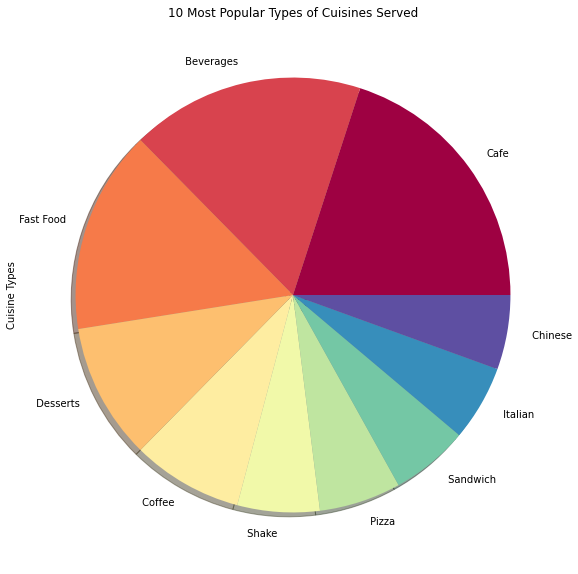

In [10]:
ax = pd.Series(series).value_counts()[:10].plot(kind='pie', shadow=True,  cmap=plt.get_cmap('Spectral'), figsize=(10,10))
ax.set_ylabel('Cuisine Types')
plot = ax.set_title("10 Most Popular Types of Cuisines Served")

In [11]:
pd.DataFrame({'No of Restuarants Serving':series.value_counts()}).head(10)

,No of Restuarants Serving
Cafe,723
Beverages,628
Fast Food,547
Desserts,366
Coffee,298
Shake,221
Pizza,220
Sandwich,209
Italian,203
Chinese,200
